<center><font size = "10"> Week 11 - Network Stimulation II and Extracellular recordings<center>
<center><font size = "8">Home Work <center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 3
<br>Group member 1: Laura TESTA
<br>Group member 2: Alice ALBRECHT
<br>Group member 3: Clara LE DRAOULEC
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignments to be delivered by next Monday before 23:59.


# <font color= 'red'>Ex 1:</font> Network activity analysis 

<font size='3'> Load the five morphology reconstructions assigned to your group in week 7, using the class `Cell` defined in the tutorials. 
Connect the neurons with following weights:
- `w(Pyr - Pyr) = 1`
- `w(Pyr - Int) = 1`
- `w(Int - Pyr) = -0.01`
- `w(Int - Int) = -0.01`

<font size='3'>Add exponential synapses to random section of the basal dendrite of each cell (synapse `weight = 1.0` and `tau = 2`). Connect different Poisson spike trains to each of the exponential synapses. (you can use your spike trains from week 10 or from this weeks tutorial). Make sure to use realistic parameters. Run the simulation of 300 ms and show the voltage and spike plots neurons and Poisson input.

<font size='3'>Using the `elephant` library calculate:
    
<font size='3'>1. The spike trains features: MFR, ISI and CV. Visualize (box plots) and compare the features between the Poisson inputs and spike trains of the neurons. Do you see any difference? Explain your answer.

<font size='3'>2. Pairwise __correlation__ coefficients and __covariance__ between the pairs of 5 neurons. Explain the difference between __covariance__, __correlation__ and __coherence__. 

<font size='3'>Hint: Make sure to represent both spike trains in ms. For box plot visualization make sure you choose right range for your y-axis.

    
<font size='3'><font color= 'red'>[2.5pts]</font>

In [20]:
!nrnivmodl

/home/WEEK11_ISN
Mod files: "./vecevent.mod"

COBJS=''
 -> Compiling mod_func.c
x86_64-linux-gnu-gcc -O2   -I.   -I/usr/local/lib/python3.8/dist-packages/neuron/.data/include  -I/nrnwheel/openmpi/include -fPIC -c mod_func.c -o mod_func.o
 => LINKING shared library ./libnrnmech.so
x86_64-linux-gnu-g++ -O2 -DVERSION_INFO='8.0.2' -std=c++11 -shared -fPIC  -I /usr/local/lib/python3.8/dist-packages/neuron/.data/include -o ./libnrnmech.so -Wl,-soname,libnrnmech.so \
  ./mod_func.o ./vecevent.o  -L/usr/local/lib/python3.8/dist-packages/neuron/.data/lib -lnrniv -Wl,-rpath,/usr/local/lib/python3.8/dist-packages/neuron/.data/lib   
rm -f ./.libs/libnrnmech.so ; mkdir -p ./.libs ; cp ./libnrnmech.so ./.libs/libnrnmech.so
Successfully created x86_64/special


In [21]:
%matplotlib inline

from neuron import h, gui
import matplotlib.pyplot as plt
import numpy as np
import random

# Load external files & initialize
h.load_file("stdrun.hoc")
h.stdinit()

0.0

### Creation of the class cell

In [22]:
class Cell:
    def __init__(self, filename, name, cell_type):
        self.name = name
        self.type = cell_type
        self.synapses = []
        self.build_morphology(filename)
        self.biophysics()

    def build_morphology(self, filename):
        h.load_file("import3d.hoc")
        h.load_file("stdlib.hoc")
        # morph_reader = h.Import3d_Neurolucida3()
        morph_reader = h.Import3d_SWC_read()
        morph_reader.input(filename)
        i3d = h.Import3d_GUI(morph_reader, 0)
        i3d.instantiate(
            self
        )  # Notice this change to be able to instantiate several cells

    def biophysics(self):
        for sec in h.allsec():
            sec.Ra = 100  # Axial resistance in Ohm * cm
            sec.cm = 1  # Membrane capacitance in micro Farads / cm^2
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75

        # Insert passive current in the dendrite
        for sec in self.soma:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        if hasattr(self, "apic"):
            for sec in self.apic:
                sec.insert("hh")
                for seg in sec:
                    seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                    seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        for sec in self.dend:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        for sec in self.axon:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

## Instantiate different cells

In [23]:
Pyr1 = Cell("Pyr_01.swc", "Pyr1", "Pyr")
Pyr2 = Cell("Pyr_02.swc", "Pyr2", "Pyr")
Pyr3 = Cell("Pyr_03.swc", "Pyr3", "Pyr")
Int1 = Cell("Int_01.swc", "Int1", "Int")
Int2 = Cell("Int_02.swc", "Int2", "Int")

cells_Pyr = [Pyr1, Pyr2, Pyr3]
cells_Int = [Int1, Int2]
cells = cells_Pyr + cells_Int

In [24]:
for c in cells_Pyr:
    print(
        "%s: %d apical sections, %d basal sections, %d soma sections and %d axon senctions"
        % (c.name, len(c.apic), len(c.dend), len(c.soma), len(c.axon))
    )
for c in cells_Int:
    print(
        "%s: %d basal sections, %d soma sections and %d axon senctions"
        % (c.name, len(c.dend), len(c.soma), len(c.axon))
    )

Pyr1: 13 apical sections, 34 basal sections, 1 soma sections and 169 axon senctions
Pyr2: 115 apical sections, 61 basal sections, 1 soma sections and 170 axon senctions
Pyr3: 46 apical sections, 37 basal sections, 1 soma sections and 81 axon senctions
Int1: 21 basal sections, 1 soma sections and 526 axon senctions
Int2: 36 basal sections, 1 soma sections and 131 axon senctions


### Neurons connected with `weight = 1.0` and exponential synapses connected with `weight = 1.0` and `tau = 2 ms`

In [25]:
# connect two cells with an exponential synapse at given locations
# returns the netcon
def connect(
    source,
    target,
    weight=None,
    delay=5,
    source_sec=5,
    source_neurite="axon",
    target_sec=10,
    target_neurite="dend",
):
    rng = np.random.default_rng()

    if weight is None:
        weight = rng.uniform()  # random weight

    target_neurite_ = getattr(target, target_neurite)
    if target_sec is None:
        target_sec = rng.integers(0, len(target_neurite_))  # random dendritic section

    source_neurite_ = getattr(source, source_neurite)
    if source_sec is None:
        source_sec = rng.integers(0, len(source_neurite_))  # random axonal section

    target_syn = h.ExpSyn(target_neurite_[target_sec](0.5))
    target.synapses.append(target_syn)  # store synapse

    netcon = h.NetCon(
        source_neurite_[source_sec](0.5)._ref_v,
        target_syn,
        sec=source_neurite_[source_sec],
    )
    netcon.weight[0] = weight

    print(
        f"Connected cells {source.name} -> {target.name} with weight {weight} and delay {delay},\
        from {source_neurite}[{source_sec}] to {target_neurite}[{target_sec}]"
    )

    return netcon

In [26]:
# Connect neurons with a weight = 1.0 or -0.01 
netcons = []  # save the netcons in case we want to modify them later

##### w(Pyr-Pyr) = 1 #####
# Connect Pyr1 to Pyr2
nc = connect(Pyr1, Pyr2, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Pyr1
nc = connect(Pyr2, Pyr1, weight=1.0)
netcons.append(nc)

# Connect Pyr1 to Pyr3
nc = connect(Pyr1, Pyr3, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Pyr1
nc = connect(Pyr3, Pyr1, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Pyr3
nc = connect(Pyr2, Pyr3, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Pyr2
nc = connect(Pyr3, Pyr2, weight=1.0)
netcons.append(nc)


##### w(Pyr-Int) = 1 #####
# Connect Pyr1 to Int1
nc = connect(Pyr1, Int1, weight=1.0)
netcons.append(nc)

# Connect Pyr1 to Int2
nc = connect(Pyr1, Int2, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Int1
nc = connect(Pyr2, Int1, weight=1.0)
netcons.append(nc)

# Connect Pyr2 to Int2
nc = connect(Pyr2, Int2, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Int1
nc = connect(Pyr3, Int1, weight=1.0)
netcons.append(nc)

# Connect Pyr3 to Int2
nc = connect(Pyr3, Int2, weight=1.0)
netcons.append(nc)


##### w(Int-Pyr) = -0.01 #####
# Connect Int1 to Pyr1
nc = connect(Int1, Pyr1, weight=-0.01)
netcons.append(nc)

# Connect Int1 to Pyr2
nc = connect(Int1, Pyr2, weight=-0.01)
netcons.append(nc)

# Connect Int1 to Pyr3
nc = connect(Int1, Pyr3, weight=-0.01)
netcons.append(nc)

# Connect Int2 to Pyr1
nc = connect(Int2, Pyr1, weight=-0.01)
netcons.append(nc)

# Connect Int2 to Pyr2
nc = connect(Int2, Pyr2, weight=-0.01)
netcons.append(nc)

# Connect Int2 to Pyr3
nc = connect(Int2, Pyr3, weight=-0.01)
netcons.append(nc)


##### w(Pyr-Int) = -0.01 #####
# Connect Int1 to Int2
nc = connect(Int1, Int2, weight=-0.01)
netcons.append(nc)

# Connect Int2 to Int1
nc = connect(Int2, Int1, weight=-0.01)
netcons.append(nc)

Connected cells Pyr1 -> Pyr2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Pyr1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Pyr3 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Pyr1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Pyr3 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Pyr2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Int1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr1 -> Int2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Int1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr2 -> Int2 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected cells Pyr3 -> Int1 with weight 1.0 and delay 5,        from axon[5] to dend[10]
Connected 

In [27]:
# Place exponential synapses in random basal dendrite sections
# Exponential synapses with tau = 2

# Cell 1
sec1 = random.randint(0, len(Pyr1.dend) - 1)
synapse1 = h.ExpSyn(Pyr1.dend[sec1](0.5))
synapse1.tau = 2  # ms
print("Stimulus applied in basal section num %s of Pyr1" % sec1)

# Cell 2
sec2 = random.randint(0, len(Pyr2.dend) - 1)
synapse2 = h.ExpSyn(Pyr2.dend[sec2](0.5))
synapse2.tau = 2  # ms
print("Stimulus applied in basal section num %s of Pyr2" % sec2)

# Cell 3
sec3 = random.randint(0, len(Pyr3.dend) - 1)
synapse3 = h.ExpSyn(Pyr3.dend[sec3](0.5))
synapse3.tau = 2  # ms
print("Stimulus applied in basal section num %s of Pyr2" % sec3)

# Cell 4
sec4 = random.randint(0, len(Int1.dend) - 1)
synapse4 = h.ExpSyn(Int1.dend[sec4](0.5))
synapse4.tau = 2  # ms
print("Stimulus applied in basal section num %s of Int1" % sec4)

# Cell 5
sec5 = random.randint(0, len(Int2.dend) - 1)
synapse5 = h.ExpSyn(Int2.dend[sec5](0.5))
synapse5.tau = 2  # ms
print("Stimulus applied in basal section num %s of Int1" % sec5)

Stimulus applied in basal section num 22 of Pyr1
Stimulus applied in basal section num 59 of Pyr2
Stimulus applied in basal section num 13 of Pyr2
Stimulus applied in basal section num 2 of Int1
Stimulus applied in basal section num 6 of Int1


### Setup stimulator per cell

In [28]:
# Create stimulators for synapses
stims = []
stim_nc = []
synapses = [synapse1, synapse2, synapse3, synapse4, synapse5]
for syn in synapses:
    stim = h.VecStim()
    nc = h.NetCon(stim, syn)
    nc.weight[0] = 0.5  # In units of [nS] due to the gmax scaling factor in our .mod file
    stims.append(stim)
    stim_nc.append(nc)

### Setup stimulation times: Poissonian

In [49]:
import elephant.spike_train_generation as elstg
import quantities as pq

# Create a Poissonian spike train
stim_rate = 60 * pq.Hz
stim_tstart = 5 * pq.ms
stim_tstop = 300 * pq.ms

stim_times = []
for stim in stims:
    sptimes = elstg.homogeneous_poisson_process(
        stim_rate, stim_tstart, stim_tstop, as_array=True
    )
    spvec = h.Vector(sptimes)
    stim.play(spvec)  # make stimulator fire at these times
    stim_times.append(sptimes)
    print(sptimes)

[  8.59852744  31.76761858  35.64476931  38.38317448  45.10909318
  45.76229199  54.11233887  61.20487187 130.85005734 164.13487994
 175.63479177 191.99210749 193.37110937 243.76151047 244.40615375
 246.30522355 264.81149295 268.32276982 281.41341372 282.47378874
 299.55352022]
[  5.24593759  20.08472872  54.02426511  78.96978444  87.1482668
  87.36348605 134.63081688 141.37345252 175.80938859 190.27782372
 200.24858863]
[ 25.52234271  31.05712008  47.4002072   59.92485644  73.02444509
  84.81516305  92.52973238 140.53509622 147.31426306 170.9943945
 236.70841687 244.83713518 248.47739975 249.90264529 275.94791344]
[ 70.7563349  116.03210593 121.28318886 150.63330212 157.25942051
 175.74043866 199.25073776 201.80865238 243.29819083 259.73053403
 297.01898988]
[ 17.20556267  35.89686969  44.24696657  64.83629685  83.06656736
 144.08415913 151.9982713  153.35698508 158.89878216 166.10999085
 173.40324731 175.09390237 185.80478203 247.54359575 255.57180086
 258.96147705 263.57413173 286.0

### Run simulation

In [50]:
recording_cells = [Pyr1, Pyr2, Pyr3, Int1, Int2]

somaV = []
for cell in recording_cells:
    s = h.Vector().record(cell.soma[0](0.5)._ref_v)
    somaV.append(s)

time = h.Vector().record(h._ref_t)
sim_tstop = 300

h.finitialize(-65)
h.continuerun(sim_tstop)

0.0

### Plot voltage traces

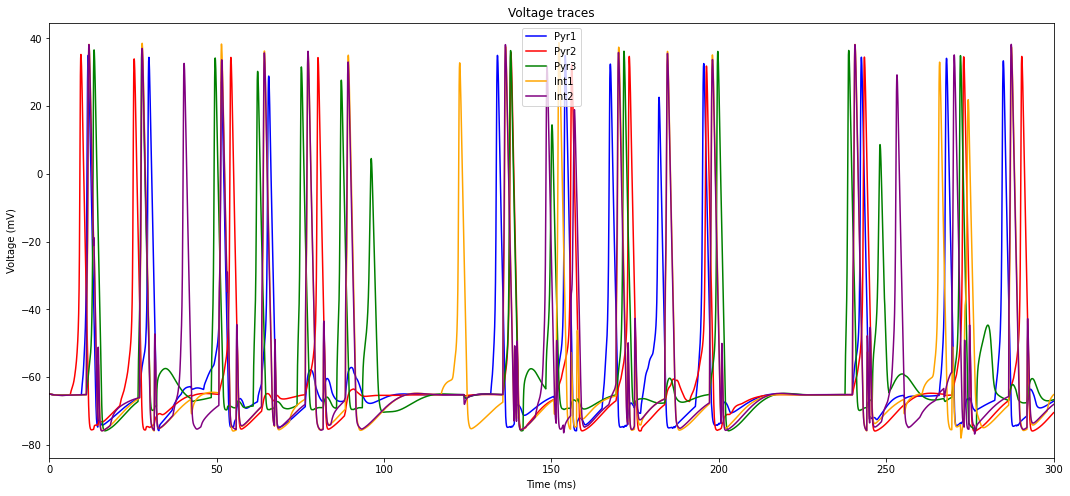

In [51]:
colors = ["blue", "red", "green", "orange", "purple"]

fig, ax = plt.subplots(figsize=(18, 8))
for cell, V, color in zip(recording_cells, somaV, colors):
    ax.plot(time, V, label=cell.name, color=color)

ax.set_xlim((0, sim_tstop))
ax.legend()
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.title('Voltage traces')
plt.show()

### Spike detection

In [52]:
from neo import AnalogSignal


def spike_detector(voltage, threshold):
    # convert Neuron recording (voltage) to neo.AnalogSignal
    sig = AnalogSignal(
        voltage, units=pq.mV, sampling_period=0.025 * pq.ms
    )  # dt = 0.025 ms
    # peak locations
    spike_time = elstg.peak_detection(sig, threshold=threshold * pq.mV, format="raw")
    return spike_time * 1000  # in ms

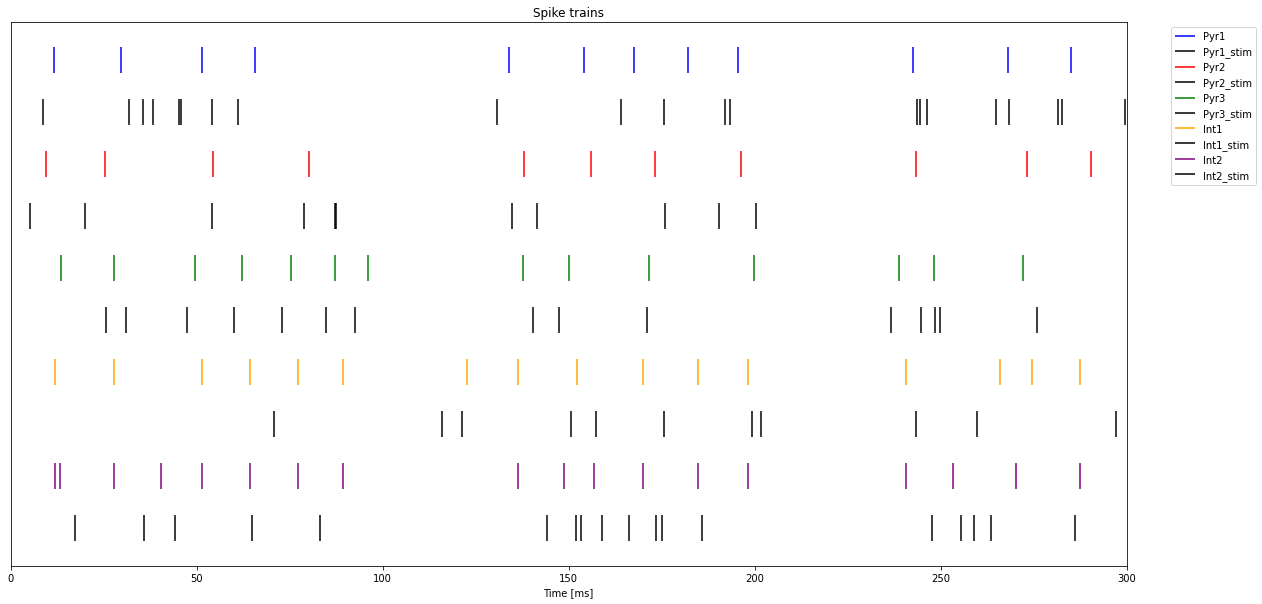

In [53]:
spike_trains = []
for V, st in zip(somaV, stim_times):
    spk = spike_detector(V, -20.0)  # tune threshold as needed
    spike_trains.append(spk)  # add cell spikes
    spike_trains.append(st)  # add stim spikes

name_lst = [[_.name, _.name + "_stim"] for _ in recording_cells]
name_lst = [x for sub in name_lst for x in sub]  # https://stackoverflow.com/a/952952

colors = ["blue", "black", "red", "black", "green", "black", "orange", "black", "purple", "black"]

fig, ax = plt.subplots(figsize=(20, 10))
for (i, name), spikes, color in zip(enumerate(name_lst), spike_trains, colors):
    ymin = 2 * i * -0.1
    ymax = 2 * i * -0.1 - 0.1
    ax.vlines(spikes, ymin=ymin, ymax=ymax, color=color, label=name)

ax.set_xlim((0, sim_tstop))
ax.set_xlabel("Time [ms]")
ax.set_yticks([])

# Put a legend below current axis
ax.legend(bbox_to_anchor=(1.12, 1))

plt.title('Spike trains')
plt.show()

## 1. Single Spike train statistics

In [54]:
import elephant.statistics as elstat

cell_MFR = []
cell_CV_of_ISI = []
poisson_MFR = []
poisson_CV_of_ISI = []

for x, s in zip(name_lst, spike_trains):
    print(x)
    fr = elstat.mean_firing_rate(s) * 1000
    print("Mean firing rate = %g Hz" % fr)
    # Inter-spike intervals
    isi = elstat.isi(s)
    cv = elstat.cv(isi)
    print("CV of ISI = %g" % cv)
    if name_lst.index(x) % 2 == 0 :
        cell_MFR.append(fr)
        cell_CV_of_ISI.append(cv)
    else :
        poisson_MFR.append(fr)
        poisson_CV_of_ISI.append(cv)

Pyr1
Mean firing rate = 42.109 Hz
CV of ISI = 0.665517
Pyr1_stim
Mean firing rate = 70.1043 Hz
CV of ISI = 1.2117
Pyr2
Mean firing rate = 37.8657 Hz
CV of ISI = 0.470476
Pyr2_stim
Mean firing rate = 54.9317 Hz
CV of ISI = 0.731176
Pyr3
Mean firing rate = 51.4328 Hz
CV of ISI = 0.523525
Pyr3_stim
Mean firing rate = 54.3581 Hz
CV of ISI = 0.983683
Int1
Mean firing rate = 55.6715 Hz
CV of ISI = 0.483637
Int1_stim
Mean firing rate = 37.0347 Hz
CV of ISI = 0.647441
Int2
Mean firing rate = 62.6414 Hz
CV of ISI = 0.678507
Int2_stim
Mean firing rate = 62.928 Hz
CV of ISI = 1.12481


### Visualization and comparison of the features between the Poisson inputs and spike trains of the neurons

In [55]:
cell_names = [x for i, x in enumerate(name_lst) if i % 2 == 0]
cell_spikes = [x for i, x in enumerate(spike_trains) if i % 2 == 0]
poisson_names = [x for i, x in enumerate(name_lst) if i % 2 == 1]
poisson_spikes = [x for i, x in enumerate(spike_trains) if i % 2 == 1]

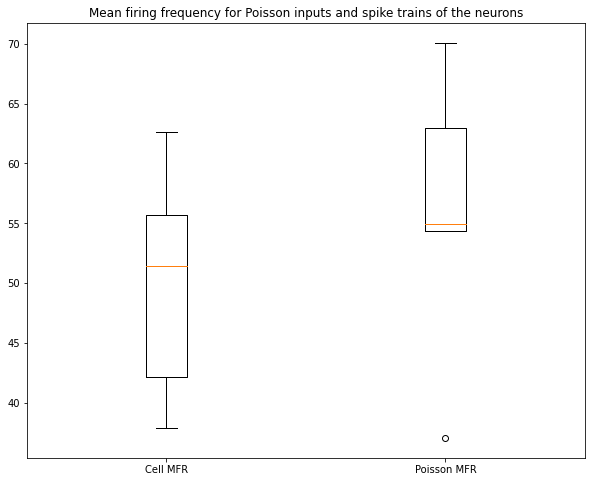

In [56]:
data = [cell_MFR, poisson_MFR]

fig, ax = plt.subplots(figsize = (10,8))
ax.boxplot(data)

plt.xticks([1, 2], ['Cell MFR', 'Poisson MFR'])
plt.title('Mean firing frequency for Poisson inputs and spike trains of the neurons')
plt.show()

Poisson inputs show a higher mean firing frequency meaning that for the same time period, there will be less action potential fired than for the Poisson inputs. This can be explained by the fact that Poisson inputs do not take into account the refractoriness of neurons. 

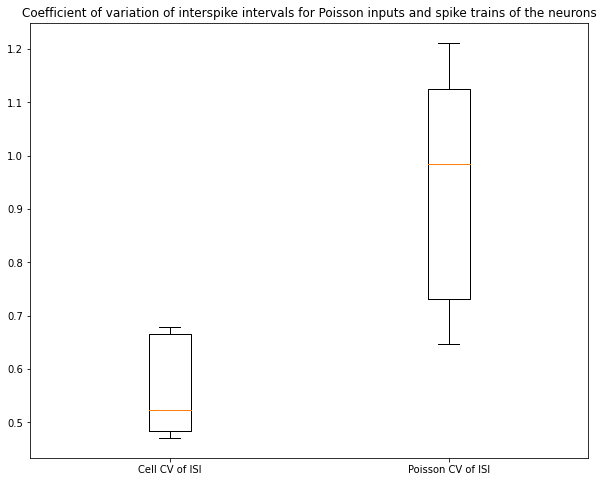

In [57]:
data2 = [cell_CV_of_ISI, poisson_CV_of_ISI]

fig, ax = plt.subplots(figsize = (10,8))
ax.boxplot(data2)

plt.xticks([1, 2], ['Cell CV of ISI', 'Poisson CV of ISI'])
plt.title('Coefficient of variation of interspike intervals for Poisson inputs and spike trains of the neurons')
plt.show()

For Poisson inputs, the coefficient of variation of the interspike time interval has a mean of 1, which correlates with the theory. However, for the spike train of the neurons, it is lower, with a mean of about 0.55, which means that the spike train is more regular. 

## 2. Correlation analysis between spike trains

In [58]:
from neo import SpikeTrain
from elephant.conversion import BinnedSpikeTrain
import elephant.spike_train_correlation as elstc

### Pairwise correlation histograms

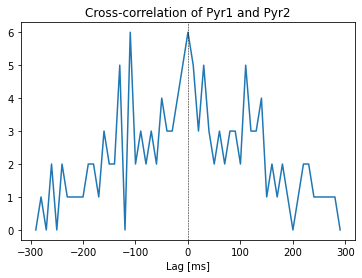

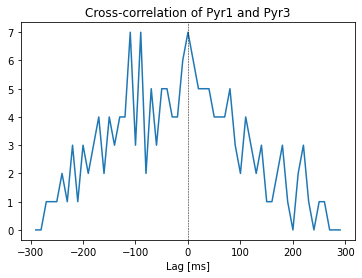

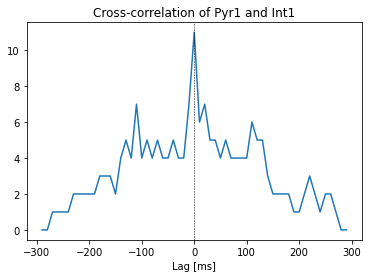

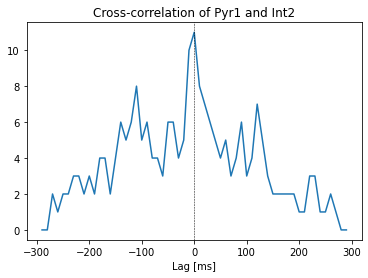

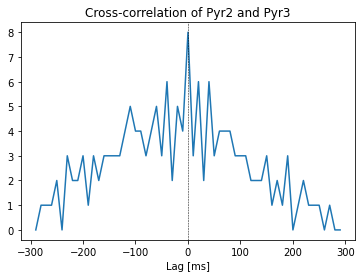

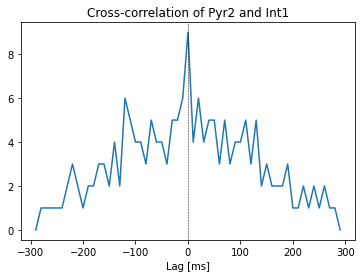

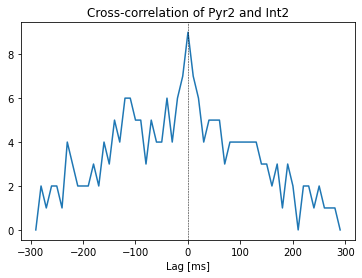

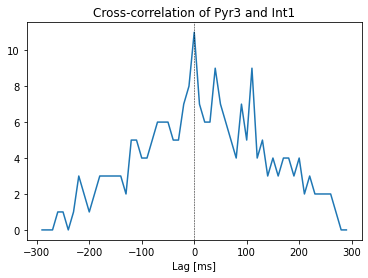

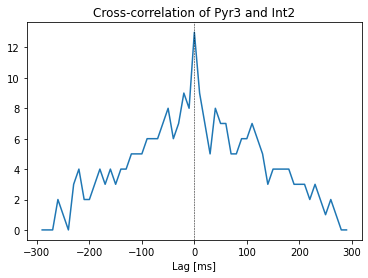

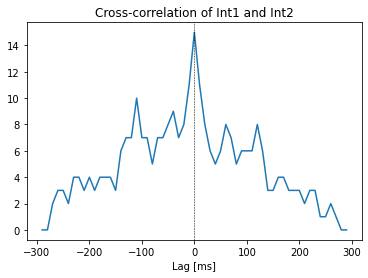

In [59]:
import itertools

# Pick only cell spike trains (saved in even entries of spike_trains)
cell_names = [x for i, x in enumerate(name_lst) if i % 2 == 0]
cell_spikes = [x for i, x in enumerate(spike_trains) if i % 2 == 0]

binsize = 10 * pq.ms  # 10 ms bin
allspikes = [SpikeTrain(x * pq.ms, t_stop=sim_tstop * pq.ms) for x in cell_spikes]
binned_spikes = [BinnedSpikeTrain(x, binsize=binsize) for x in allspikes]

for a, b in itertools.combinations(zip(cell_names, binned_spikes), 2):
    cch, lags = elstc.cross_correlation_histogram(a[1], b[1], border_correction=False)
    fig, ax = plt.subplots()
    ax.set_title("Cross-correlation of {} and {}".format(a[0], b[0]))
    ax.set_xlabel("Lag [ms]")
    plt.plot(lags * binsize, cch)
    plt.axvline(0, ls="--", color="black", lw=0.5)

### Pairwise correlation coefficients

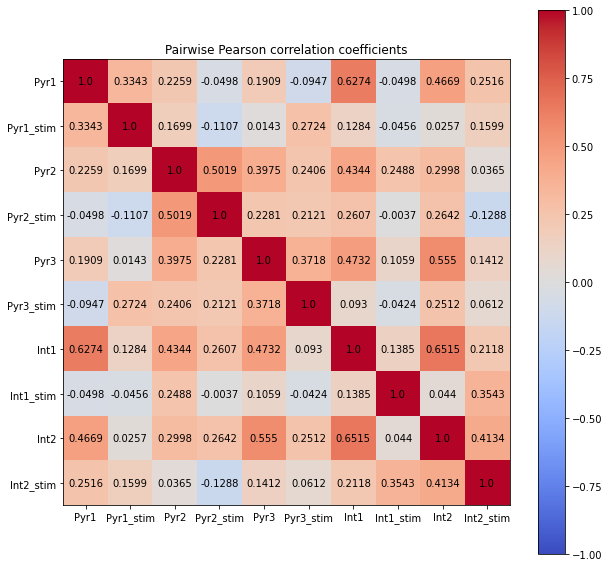

In [60]:
# We bin the spikes in both cell and stim spikes
allspikes = [SpikeTrain(x * pq.ms, t_stop=sim_tstop * pq.ms) for x in spike_trains]
binned_spikes = BinnedSpikeTrain(allspikes, binsize=10 * pq.ms)  # 10 ms bin
# Correlation coefficient matrix between all spike trains
cc = elstc.corrcoef(binned_spikes)

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cc, cmap="coolwarm", vmin=-1.0, vmax=1.0, origin="upper")

# We want to show all ticks...
ax.set_xticks(np.arange(len(name_lst)))
ax.set_yticks(np.arange(len(name_lst)))
# ... and label them with the respective list entries
ax.set_xticklabels(name_lst)
ax.set_yticklabels(name_lst)

# Loop over data dimensions and create text annotations.
for i in range(len(name_lst)):
    for j in range(len(name_lst)):
        text = ax.text(
            j, i, np.round(cc[i, j], 4), ha="center", va="center", color="black"
        )

ax.set_title("Pairwise Pearson correlation coefficients")
plt.colorbar(im)
plt.show()

Covariance explains how much two variables differ, whereas correlation is used to measure the strength of the relationship between two continuous variables and is normalized between -1 and 1.
The correlation can be seen as a normalization of the covariance. They both indicate the direction of the linear relationship of two variables but as correlation is normalized, it also indicates the strength of this relationship. 

Coherence measures the quality of the information between two variables, meaning how much the data are logically connected and complete. It also describes the linear relationship between two variables but is less sensitive to noise and more robust.

# <font color= 'red'>Ex 2:</font> Extracelullar response to the synaptic input 

<font size='3'> Choose one pyramidal and one inihibitory cell models from your set of morphologies. Perform the stimulation protocol from tutorial 3. Make sure to correct for the rotation angles, as the cell needs to be aligned with the electrode line. 

<font size='3'>Explain what do you see on the final plots. Are there differences between the two neurons?
    
<font size='3'><font color= 'red'>[1.5 pts]</font>

<font size='3'>First step is to import LFPy and other packages for analysis and plotting:

In [1]:
import LFPy
import numpy as np
import matplotlib.pyplot as plt

--No graphics will be displayed.


### Stimulation protocol for one pyramidal cell (Pyr01)

<font size='3'>Create some dictionarys with parameters for cell, synapse and extracellular electrode:

In [2]:
cell_parameters = {
    "morphology": "Pyr_02.swc",
    "tstart": -50,
    "tstop": 100,
    "dt": 2 ** -4,
    "passive": True,
}

synapse_parameters = {
    "syntype": "Exp2Syn",
    "e": 0.0,
    "tau1": 0.5,
    "tau2": 2.0,
    "weight": 0.05,
    "record_current": True,
}

z = np.mgrid[-800:1201:100]

electrode_parameters = {
    "x": np.zeros(z.size),
    "y": np.zeros(z.size),
    "z": z,
    "sigma": 0.3,
}

<font size='3'>Then, create the cell, synapse and electrode objects using LFPy.Cell, LFPy.Synapse, LFPy.RecExtElectrode.
    
<font size='3'>__IMPORTANT:__ You would probably need to change the rotation angles to be able to align your cell with the line of electrodes.

In [3]:
cell = LFPy.Cell(**cell_parameters)
cell.set_pos(x=0, y=0, z=0)

cell.set_rotation(
    x=4.71239, y=0.0, z=4.71239, rotation_order="xyz"
)  # angles in radians!!


synapse = LFPy.Synapse(cell, idx=cell.get_closest_idx(z=300), **synapse_parameters)
synapse.set_spike_times(np.array([10, 30, 50]))

electrode = LFPy.RecExtElectrode(cell, **electrode_parameters)

<font size='3'>Run the simulation with electrode as input to cell.simulate()

In [4]:
# This will take a while.
cell.simulate(probes=[electrode])

<font size='3'>Then plot the somatic potential and the LFP from electrode object:

/tmp/ipykernel_1433/3143709130.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(electrode.x, electrode.z, ".", marker="o", color="g")
/tmp/ipykernel_1433/3143709130.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(


Text(0.5, 1.0, 'LFP (mV)')

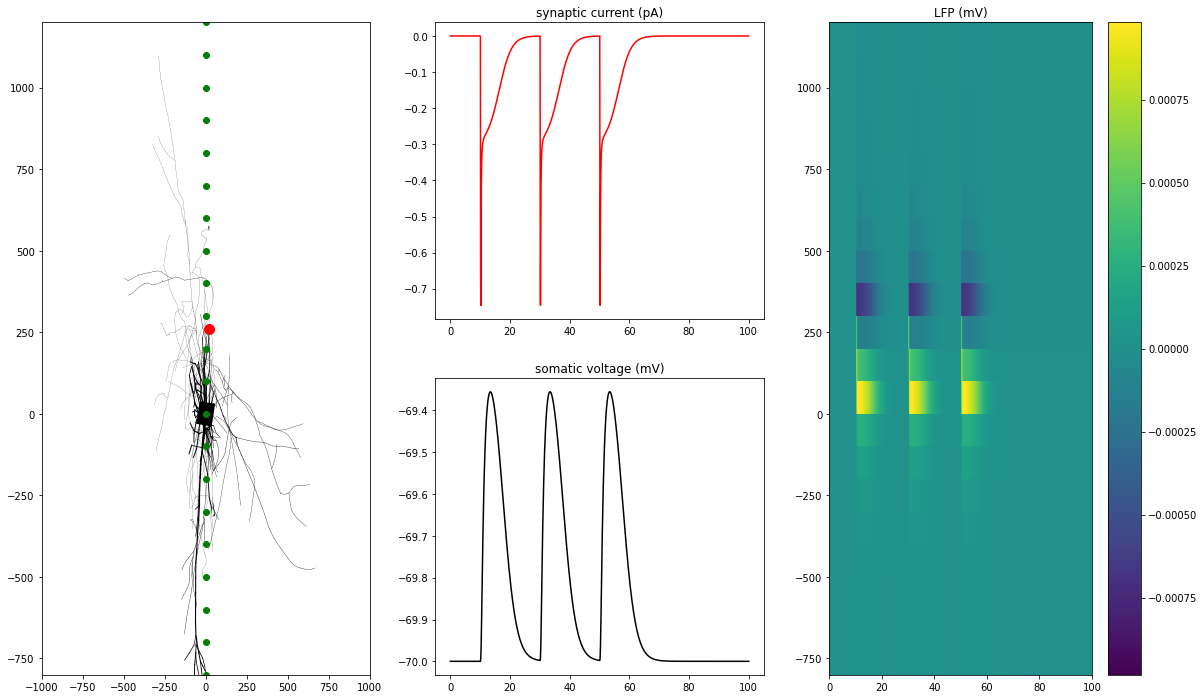

In [5]:
plt.figure(figsize=(20, 12))

plt.subplot(131)
for x, z, lw in zip(cell.x, cell.z, cell.d):
    plt.plot(x, z, lw=lw, color="k")

plt.plot(
    [cell.synapses[0].x], [cell.synapses[0].z], color="r", marker="o", markersize=10
)
plt.plot(electrode.x, electrode.z, ".", marker="o", color="g")
plt.axis([-1000, 1000, -800, 1200])

plt.subplot(232)
plt.plot(cell.tvec, synapse.i, "r"), plt.title("synaptic current (pA)")

plt.subplot(235)
plt.plot(cell.tvec, cell.somav, "k"), plt.title("somatic voltage (mV)")

plt.subplot(133)
plt.pcolormesh(
    cell.tvec,
    electrode.z,
    electrode.data,
    vmin=-abs(electrode.data).max(),
    vmax=abs(electrode.data).max(),
)
plt.colorbar()
plt.title("LFP (mV)")

### Stimulation protocol for one inhibitory cell (Int01)

<font size='3'>Create some dictionarys with parameters for cell, synapse and extracellular electrode:

In [6]:
cell_parameters = {
    "morphology": "Int_02.swc",
    "tstart": -50,
    "tstop": 100,
    "dt": 2 ** -4,
    "passive": True,
}

synapse_parameters = {
    "syntype": "Exp2Syn",
    "e": 0.0,
    "tau1": 0.5,
    "tau2": 2.0,
    "weight": 0.05,
    "record_current": True,
}

z = np.mgrid[-800:1201:100]

electrode_parameters = {
    "x": np.zeros(z.size),
    "y": np.zeros(z.size),
    "z": z,
    "sigma": 0.3,
}

<font size='3'>Then, create the cell, synapse and electrode objects using LFPy.Cell, LFPy.Synapse, LFPy.RecExtElectrode.
    
<font size='3'>__IMPORTANT:__ You would probably need to change the rotation angles to be able to align your cell with the line of electrodes.

In [7]:
cell = LFPy.Cell(**cell_parameters)
cell.set_pos(x=0, y=0, z=0)

cell.set_rotation(
    x=4.71239, y=0.0, z=4.71239, rotation_order="xyz"
)  # angles in radians!!


synapse = LFPy.Synapse(cell, idx=cell.get_closest_idx(z=300), **synapse_parameters)
synapse.set_spike_times(np.array([10, 30, 50]))

electrode = LFPy.RecExtElectrode(cell, **electrode_parameters)

<font size='3'>Run the simulation with electrode as input to cell.simulate()

In [8]:
# This will take a while.
cell.simulate(probes=[electrode])

<font size='3'>Then plot the somatic potential and the LFP from electrode object:

/tmp/ipykernel_1433/3143709130.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(electrode.x, electrode.z, ".", marker="o", color="g")
/tmp/ipykernel_1433/3143709130.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(


Text(0.5, 1.0, 'LFP (mV)')

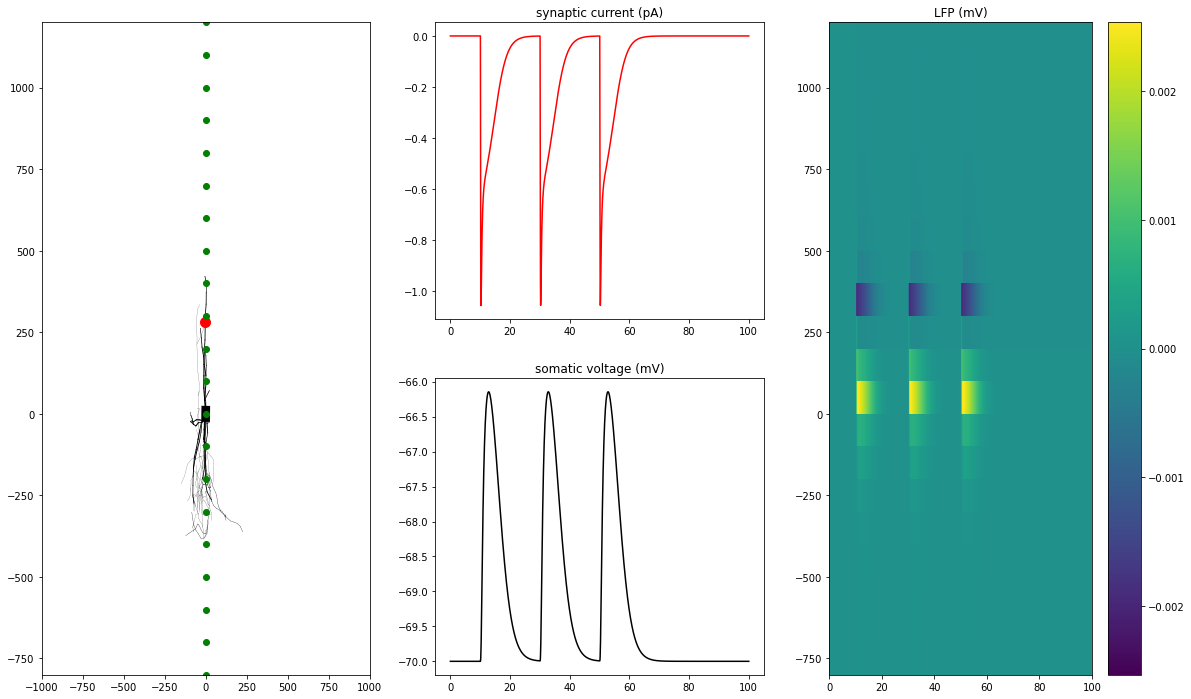

In [9]:
plt.figure(figsize=(20, 12))

plt.subplot(131)
for x, z, lw in zip(cell.x, cell.z, cell.d):
    plt.plot(x, z, lw=lw, color="k")

plt.plot(
    [cell.synapses[0].x], [cell.synapses[0].z], color="r", marker="o", markersize=10
)
plt.plot(electrode.x, electrode.z, ".", marker="o", color="g")
plt.axis([-1000, 1000, -800, 1200])

plt.subplot(232)
plt.plot(cell.tvec, synapse.i, "r"), plt.title("synaptic current (pA)")

plt.subplot(235)
plt.plot(cell.tvec, cell.somav, "k"), plt.title("somatic voltage (mV)")

plt.subplot(133)
plt.pcolormesh(
    cell.tvec,
    electrode.z,
    electrode.data,
    vmin=-abs(electrode.data).max(),
    vmax=abs(electrode.data).max(),
)
plt.colorbar()
plt.title("LFP (mV)")

In the 2 plots we can observed on the left the cell and check the it's well aligned with the electrodes. We can also observed the synaptic current, somatic voltage and LFP in function of time (duration of 100ms here). To compare the two plots, we see that the inhibitory cell as more negative current: it exceeds -1.0 while the minimum current is around -0.75 for the pyramidal cells. Logicaly this leads to smaller depolarization, the amplitudes of each potentiel peak is smaller for the pyramidal cells ($\Delta$Amp ≃ 0.7) than inhibitory cell ($\Delta$Amp ≃ 3.8). However the LFP plot looks very similar for the two cells.

In the 2 plots, we can observe on the left the cell and check that it is well aligned with the electrodes. We can also observe the synaptic current, the somatic voltage and the LFP as a function of time (100ms duration here). Comparing the two graphs, we see that the inhibitory cell has a more negative current impulse: it exceeds -1.0 while the minimum current is around -0.75 for the pyramidal cells. Logically this leads to a bigger depolarization, the amplitudes of each potential peak are lower for the pyramidal cells ($\Delta$Amp ≃ 0.7) than for the inhibitory cells ($\Delta$Amp ≃ 3.8). However, the LFP plot is very similar for both cells.

# <font color= 'red'>Ex 3:</font> Extracellular field

<font size='3'>Choose one pyramidal cell and one inhibitory cell from your set of cells. Run the code from tutorial 04 for each of the cells and compare the resulted response field for each of them. Explain what differences do you see and why.

<font size='3'><font color= 'red'>[2 pts]</font>   

For this exercise, we chose the same cells as for exercise 2. We begin with the Pyr cell.

## Set parameters

In [25]:
import LFPy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

## Pyr02 cell

## Set parameters

In [26]:
# Define cell parameters
cell_parameters = {
    "morphology": "Pyr_02.swc",  # from Mainen & Sejnowski, J Comput Neurosci, 1996
    "cm": 1.0,  # membrane capacitance
    "Ra": 150.0,  # axial resistance
    "v_init": -65.0,  # initial crossmembrane potential
    "passive": True,  # turn on NEURONs passive mechanism for all sections
    "passive_parameters": {"g_pas": 1.0 / 30000, "e_pas": -65},
    "nsegs_method": "lambda_f",  # spatial discretization method
    "lambda_f": 100.0,  # frequency where length constants are computed
    "dt": 2.0 ** -3,  # simulation time step size
    "tstart": 0.0,  # start time of simulation, recorders start at t=0
    "tstop": 100.0,  # stop simulation at 100 ms.
}

## Create cell and rotate

In [27]:
# Create cell
cell = LFPy.Cell(**cell_parameters)
# Align cell
cell.set_rotation(x=4.71239, y=0.0, z=4.71239)  # same rotation angles as in tutorial 03

In [28]:
# Create cell
cell = LFPy.Cell(**cell_parameters)
# Align cell
cell.set_rotation(x=4.71239, y=0.0, z=4.71239)  # same rotation angles as in tutorial 03

## Define Synapse parameters

In [29]:
synapse_parameters = {
    "idx": cell.get_closest_idx(x=-200.0, y=0.0, z=800.0),
    "e": 0.0,  # reversal potential
    "syntype": "ExpSyn",  # synapse type
    "tau": 5.0,  # synaptic time constant
    "weight": 0.1,  # synaptic weight
    "record_current": True,  # record synapse current
}

## Create synapse and set time of synaptic input

In [30]:
synapse = LFPy.Synapse(cell, **synapse_parameters)
synapse.set_spike_times(np.array([20.0]))

## Electrodes

In [31]:
# Create a grid of measurement locations, in (mum)
X, Z = np.mgrid[-700:701:50, -400:1201:50]
Y = np.zeros(X.shape)

# Define electrode parameters
grid_electrode_parameters = {
    "sigma": 0.3,  # extracellular conductivity
    "x": X.flatten(),  # electrode requires 1d vector of positions
    "y": Y.flatten(),
    "z": Z.flatten(),
}

In [32]:
# Define electrode parameters
point_electrode_parameters = {
    "sigma": 0.3,  # extracellular conductivity
    "x": np.array([-130.0, -220.0]),
    "y": np.array([0.0, 0.0]),
    "z": np.array([0.0, 700.0]),
}

## Run simulation

In [33]:
# Run simulation, electrode object argument in cell.simulate

# Create electrode objects
grid_electrode = LFPy.RecExtElectrode(cell, **grid_electrode_parameters)
point_electrode = LFPy.RecExtElectrode(cell, **point_electrode_parameters)

In [34]:
# This will take a while.

cell.simulate(probes=[grid_electrode, point_electrode], rec_imem=True)

# Plot simulation output:

[Text(-50.0, 0, ''),
 Text(0.0, 0, ''),
 Text(50.0, 0, ''),
 Text(100.0, 0, ''),
 Text(150.0, 0, '')]

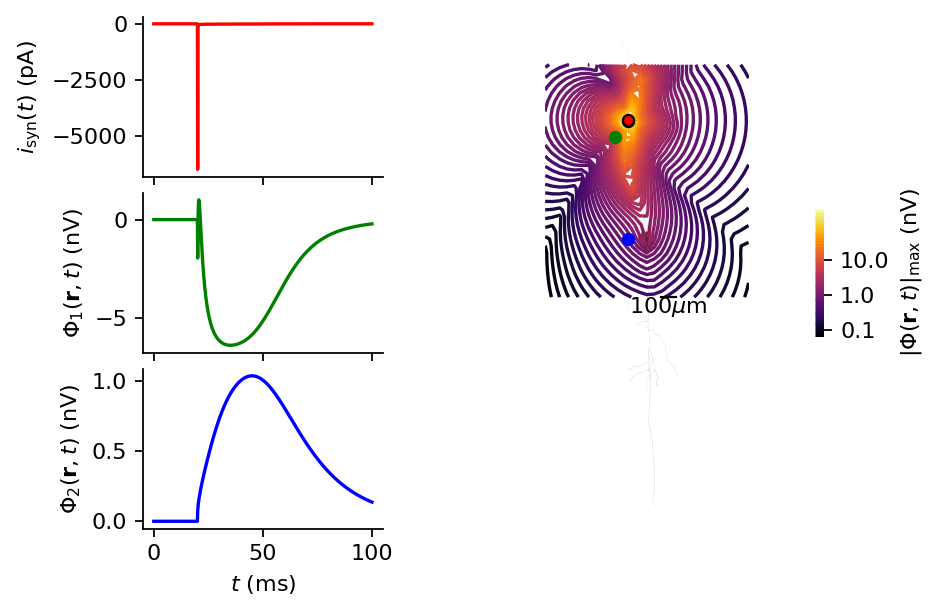

In [35]:
fig = plt.figure(dpi=160)

ax = fig.add_axes([0.4, 0.1, 0.55, 0.8], aspect="equal", frameon=False)
cax = fig.add_axes([0.85, 0.4, 0.01, 0.2], frameon=False)

LFP = np.max(np.abs(grid_electrode.data), 1).reshape(X.shape)
im = ax.contour(X, Z, np.log10(LFP), 50, cmap="inferno", zorder=-2)
# im = ax.contour(X, Z, LFP, 50, cmap="inferno", zorder=-2)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label("$|\Phi(\mathbf{r}, t)|_\mathrm{max}$ (nV)")
cbar.outline.set_visible(False)

# get some log-linear tickmarks and ticklabels
ticks = np.arange(np.ceil(np.log10(LFP.min())), np.floor(np.log10(LFP.max())))
cbar.set_ticks(ticks)
cbar.set_ticklabels(np.round(10.0 ** ticks * 1e6, decimals=1))  # mV -> nV

# plot morphology
zips = []
for x, z in cell.get_idx_polygons():
    zips.append(list(zip(x, z)))
polycol = PolyCollection(zips, edgecolors="none", facecolors="k")
ax.add_collection(polycol)

ax.plot([100, 200], [-400, -400], "k", lw=1, clip_on=False)
ax.text(150, -470, r"100$\mu$m", va="center", ha="center")

ax.axis("off")


ax.plot(
    cell.x[cell.synidx],
    cell.z[cell.synidx],
    "o",
    ms=5,
    markeredgecolor="k",
    markerfacecolor="r",
)

color_vec = ["blue", "green"]
for i in range(2):
    ax.plot(
        point_electrode_parameters["x"][i],
        point_electrode_parameters["z"][i],
        "o",
        ms=6,
        markeredgecolor="none",
        markerfacecolor=color_vec[i],
    )

plt.axes([0.15, 0.10, 0.25, 0.25])
plt.plot(cell.tvec, point_electrode.data[0] * 1e6, color=color_vec[0], clip_on=False)
plt.ylabel(r"$\Phi_2(\mathbf{r},t)$ (nV)")
plt.xlabel(r"$t$ (ms)")
plt.axis("tight")
ax = plt.gca()
for loc, spine in ax.spines.items():
    if loc in ["right", "top"]:
        spine.set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")


plt.axes([0.15, 0.375, 0.25, 0.25])
plt.plot(cell.tvec, point_electrode.data[1] * 1e6, color=color_vec[1], clip_on=False)
plt.ylabel(r"$\Phi_1(\mathbf{r}, t)$ (nV)")
plt.axis("tight")
ax = plt.gca()
for loc, spine in ax.spines.items():
    if loc in ["right", "top"]:
        spine.set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")
ax.set_xticklabels([])

plt.axes([0.15, 0.65, 0.25, 0.25])
plt.plot(cell.tvec, synapse.i * 1e3, color="red", clip_on=False)
plt.ylabel(r"$i_\mathrm{syn}(t)$ (pA)")
plt.axis("tight")
ax = plt.gca()
for loc, spine in ax.spines.items():
    if loc in ["right", "top"]:
        spine.set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")
ax.set_xticklabels([])

## Inh02 cell

## Set parameters

In [38]:
# Define cell parameters
cell_parameters = {
    "morphology": "Int_02.swc",  # from Mainen & Sejnowski, J Comput Neurosci, 1996
    "cm": 1.0,  # membrane capacitance
    "Ra": 150.0,  # axial resistance
    "v_init": -65.0,  # initial crossmembrane potential
    "passive": True,  # turn on NEURONs passive mechanism for all sections
    "passive_parameters": {"g_pas": 1.0 / 30000, "e_pas": -65},
    "nsegs_method": "lambda_f",  # spatial discretization method
    "lambda_f": 100.0,  # frequency where length constants are computed
    "dt": 2.0 ** -3,  # simulation time step size
    "tstart": 0.0,  # start time of simulation, recorders start at t=0
    "tstop": 100.0,  # stop simulation at 100 ms.
}

## Create cell and rotate

In [39]:
# Create cell
cell = LFPy.Cell(**cell_parameters)
# Align cell
cell.set_rotation(x=4.71239, y=0.0, z=4.71239)  # same rotation angles as in tutorial 03

In [40]:
# Create cell
cell = LFPy.Cell(**cell_parameters)
# Align cell
cell.set_rotation(x=4.71239, y=0.0, z=4.71239)  # same rotation angles as in tutorial 03

## Define Synapse parameters

In [41]:
synapse_parameters = {
    "idx": cell.get_closest_idx(x=-200.0, y=0.0, z=800.0),
    "e": 0.0,  # reversal potential
    "syntype": "ExpSyn",  # synapse type
    "tau": 5.0,  # synaptic time constant
    "weight": 0.1,  # synaptic weight
    "record_current": True,  # record synapse current
}

## Create synapse and set time of synaptic input

In [42]:
synapse = LFPy.Synapse(cell, **synapse_parameters)
synapse.set_spike_times(np.array([20.0]))

## Electrodes

In [43]:
# Create a grid of measurement locations, in (mum)
X, Z = np.mgrid[-700:701:50, -400:1201:50]
Y = np.zeros(X.shape)

# Define electrode parameters
grid_electrode_parameters = {
    "sigma": 0.3,  # extracellular conductivity
    "x": X.flatten(),  # electrode requires 1d vector of positions
    "y": Y.flatten(),
    "z": Z.flatten(),
}

In [44]:
# Define electrode parameters
point_electrode_parameters = {
    "sigma": 0.3,  # extracellular conductivity
    "x": np.array([-130.0, -220.0]),
    "y": np.array([0.0, 0.0]),
    "z": np.array([0.0, 700.0]),
}

## Run simulation

In [45]:
# Run simulation, electrode object argument in cell.simulate

# Create electrode objects
grid_electrode = LFPy.RecExtElectrode(cell, **grid_electrode_parameters)
point_electrode = LFPy.RecExtElectrode(cell, **point_electrode_parameters)

In [46]:
# This will take a while.

cell.simulate(probes=[grid_electrode, point_electrode], rec_imem=True)

# Plot simulation output:

[Text(-50.0, 0, ''),
 Text(0.0, 0, ''),
 Text(50.0, 0, ''),
 Text(100.0, 0, ''),
 Text(150.0, 0, '')]

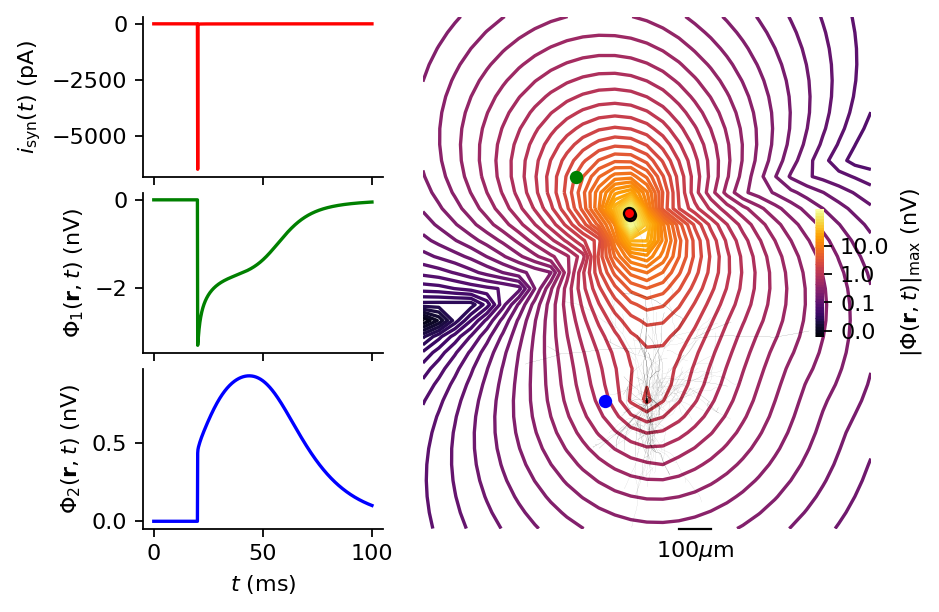

In [47]:
fig = plt.figure(dpi=160)

ax = fig.add_axes([0.4, 0.1, 0.55, 0.8], aspect="equal", frameon=False)
cax = fig.add_axes([0.85, 0.4, 0.01, 0.2], frameon=False)

LFP = np.max(np.abs(grid_electrode.data), 1).reshape(X.shape)
im = ax.contour(X, Z, np.log10(LFP), 50, cmap="inferno", zorder=-2)
# im = ax.contour(X, Z, LFP, 50, cmap="inferno", zorder=-2)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label("$|\Phi(\mathbf{r}, t)|_\mathrm{max}$ (nV)")
cbar.outline.set_visible(False)

# get some log-linear tickmarks and ticklabels
ticks = np.arange(np.ceil(np.log10(LFP.min())), np.floor(np.log10(LFP.max())))
cbar.set_ticks(ticks)
cbar.set_ticklabels(np.round(10.0 ** ticks * 1e6, decimals=1))  # mV -> nV

# plot morphology
zips = []
for x, z in cell.get_idx_polygons():
    zips.append(list(zip(x, z)))
polycol = PolyCollection(zips, edgecolors="none", facecolors="k")
ax.add_collection(polycol)

ax.plot([100, 200], [-400, -400], "k", lw=1, clip_on=False)
ax.text(150, -470, r"100$\mu$m", va="center", ha="center")

ax.axis("off")


ax.plot(
    cell.x[cell.synidx],
    cell.z[cell.synidx],
    "o",
    ms=5,
    markeredgecolor="k",
    markerfacecolor="r",
)

color_vec = ["blue", "green"]
for i in range(2):
    ax.plot(
        point_electrode_parameters["x"][i],
        point_electrode_parameters["z"][i],
        "o",
        ms=6,
        markeredgecolor="none",
        markerfacecolor=color_vec[i],
    )

plt.axes([0.15, 0.10, 0.25, 0.25])
plt.plot(cell.tvec, point_electrode.data[0] * 1e6, color=color_vec[0], clip_on=False)
plt.ylabel(r"$\Phi_2(\mathbf{r},t)$ (nV)")
plt.xlabel(r"$t$ (ms)")
plt.axis("tight")
ax = plt.gca()
for loc, spine in ax.spines.items():
    if loc in ["right", "top"]:
        spine.set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")


plt.axes([0.15, 0.375, 0.25, 0.25])
plt.plot(cell.tvec, point_electrode.data[1] * 1e6, color=color_vec[1], clip_on=False)
plt.ylabel(r"$\Phi_1(\mathbf{r}, t)$ (nV)")
plt.axis("tight")
ax = plt.gca()
for loc, spine in ax.spines.items():
    if loc in ["right", "top"]:
        spine.set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")
ax.set_xticklabels([])

plt.axes([0.15, 0.65, 0.25, 0.25])
plt.plot(cell.tvec, synapse.i * 1e3, color="red", clip_on=False)
plt.ylabel(r"$i_\mathrm{syn}(t)$ (pA)")
plt.axis("tight")
ax = plt.gca()
for loc, spine in ax.spines.items():
    if loc in ["right", "top"]:
        spine.set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")
ax.set_xticklabels([])

Comparing both graph, we observe that in the excitatory cell phi1 goes higher than in the inhibitory cell. In the graph of the absolute phi, we indeed observe that phi is more sparse in the inhibitory cell and less concentrated in one point, as it is for the excitatory cell. 